<a href="https://colab.research.google.com/github/Renee751/Data_Analytics_Python_Github/blob/main/Assignment_Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [106]:
df = pd.read_csv('https://github.com/Renee751/Data_Analytics_Python_Github/raw/main/attacks.csv', encoding = "ISO-8859-1")
# display(df)

## Stap 1:
*   Missing values analyseren mbh barchart
*   Functie om per colum de (missing) values te analyseren




In [107]:
# A vertical bar chart with a bar for each column: SUM
def bar_missing_values(dataframe):
  fig, ax = plt.subplots()

  data = dataframe.columns
  percentage_missing = dataframe.isnull().sum()

  ax.bar(data,percentage_missing)

  plt.xlabel('data')
  plt.ylabel('percentage of missing value')
  plt.title('percentage of missing values per column/data')
  plt.xticks(rotation=45)

  fig.set_size_inches(10,5)
  print(plt.show())


# A vertical bar chart with a bar for each column: MEAN
def bar_missing_values_percent(dataframe):
  fig, ax = plt.subplots()

  data = dataframe.columns
  percentage_missing = dataframe.isnull().mean() * 100

  ax.bar(data,percentage_missing)

  plt.xlabel('data')
  plt.ylabel('percentage of missing value')
  plt.title('percentage of missing values per column/data')
  plt.xticks(rotation=45)

  fig.set_size_inches(10,5)
  print(plt.show())


In [108]:
# Data clean voor alle kolommen.
def missing_values(column, casttype):
  slicing = 10
  display(f' ***** Info missing values: {column} *****')
  print('\n')

  # Unique values
  unique_values = df3[column].unique()
  count_unique_values = len(unique_values)
  if len(df3[column]) == count_unique_values:
    print('1. all values are unique')
  else:
    try:
      sorted = np.sort(unique_values)
      print("1. Values are sorted")
      display((sorted))
    except:
      print("1. Could not sort values")
      display((unique_values))


  # Sorting
    try:
      sorted = np.sort(unique_values)
      print(f'2. Sorted: first {slicing} = {sorted[:slicing]}')
      print(f'2. Sorted: last  {slicing} = {sorted[-slicing:]}')
    except TypeError as error:
      print(f"\n 2. Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting\n")
      non_null_uniques = df3.loc[~df3[column].isnull(), column].unique()
      sorted = np.sort(non_null_uniques)
      print(f'{sorted[:slicing]}')
      print(f'{sorted[-slicing:]}\n')

  # Casting
  try:
      df3[column].astype(casttype)
      print(f'\n3. Casting: Casting to {casttype} was succesful\n')
  except ValueError as error:
      print(f'\n3. Casting: Could not cast to {casttype}: {error}\n')

  # Frequency
  print('4. Frequency:')
  display(df3[column].value_counts(dropna= False).head(50))


## Stap 2: Basic cleanup.
Verwijderen van kolommen die niet gebruikt worden + rijen waar geen waarden in staan.


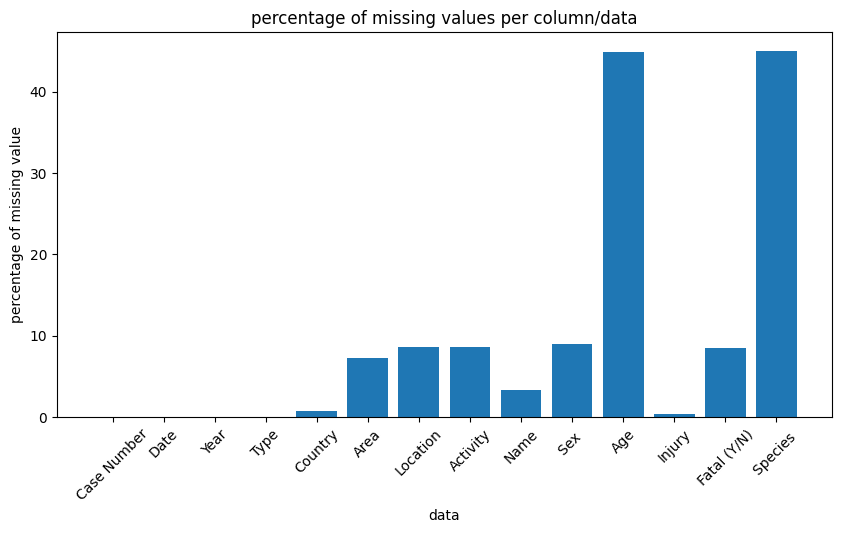

None


In [109]:
# BASIC CLEAN UP

# Als alle rijen geen waarde hebben dan de rij verwijderen + onnodige kolommen verwijderen
df1 = df.dropna(how="all")
# bar_missing_values(df1)
# display(df1)

# Verwijderen van irrelevante kolommen
df2 = df1.drop(['Investigator or Source', 'pdf', 'href formula','href','Case Number.1', 'Case Number.2',  'original order', 'Unnamed: 22', 'Unnamed: 23', 'Time'], axis=1)
# bar_missing_values_percent(df2)
# display(df2)

# Case number heeft veel 0 waardes waarbij andere kolommen veel nulvalues hebben:
df2['Case Number'].astype(str)
df2['Case Number'].replace('0', np.nan, inplace=True)

# Als alle rijen geen waarde hebben dan de rij verwijderen + onnodige kolommen verwijderen
df3 = df2.dropna(how="all").copy()
# display(df3)
bar_missing_values_percent(df3)


# Stap 3: Cleaning Age & Species


In [111]:
# AGE

# Child = <18jaar. Indien niet goed aangegeven maar aanduiding = child; dan leeftijd 2 gegeven
# Child = >=18jaar. Indien niet goed aangegeven maar aanduiding = adult; dan leeftijd 40 gegeven

# df3['Age'] = df3['Age'].astype(str)  # Zorg ervoor dat de waarden als tekst worden behandeld
df3.loc[:, 'Age'] = df3['Age'].astype(str)  # Gebruik .loc om toewijzing te doen


# Controleer of veel voorkomende aanduidingen voorkomen in de kolom?
# months , teen = <18jaar // Adult en elderly >18jaar //
df3.loc[df3['Age'].str.contains('months'), 'Age'] = '2'
df3.loc[df3['Age'].str.contains('teen'), 'Age'] = '2'
df3.loc[df3['Age'].str.contains('Teen'), 'Age'] = '2'
df3.loc[df3['Age'].str.contains('adult'), 'Age'] = '40'
df3.loc[df3['Age'].str.contains('Elderly'), 'Age'] = '70'
df3.loc[df3['Age'].str.contains('young|16 to 18|A.M.|F|X|20?|\xa0 '), 'Age'] = np.nan

# Specifieke gevallen - had dit ook automatisch gekunt ipv handmatig zoals hieronder?
df3.loc[df3['Age'].str.contains(">50"), 'Age'] = '50'
df3.loc[df3['Age'].str.contains('Both 11'), 'Age'] = '11'
df3.loc[df3['Age'].str.contains('Ca. 33'), 'Age'] = '33'
df3.loc[df3['Age'].str.contains('mid-20s'), 'Age'] = '25'
df3.loc[df3['Age'].str.contains('mid-30'), 'Age'] = '35'
df3.loc[df3['Age'].str.contains('6½'), 'Age'] = '6'

# Controleer of de waarde 3 tekens bevat en eindigt met 's'
mask_s = ((df3['Age'].str.len() == 3) & (df3['Age'].str.endswith("s"))) | ((df3['Age'].str.len() == 4) & (df3['Age'].str.endswith("'s")))
# Wijs de eerste 2 tekens toe aan de 'Age'-kolom als de maskerwaarde waar is
df3.loc[mask_s, 'Age'] = df3.loc[mask_s, 'Age'].str[:2]

df3.loc[:, 'Age'] = df3['Age'].replace('', np.nan)
df3.loc[:, 'Age'] = df3['Age'].replace('nan', np.nan)
df3.loc[:, 'Age'] = df3['Age'].replace("'nan'", np.nan)

# alle waarden die &, or, to bevatten opsplitsen en checken: alle waarden <18 dan 2 (child), alle waarden >=18 dan 40 (adult), anders np.nan
import re

def age_category(row):
    if '&' in row or 'or' in row:
      values = re.split('&|or|to', row)
      values = [value.strip() for value in values]

      if all(value.isdigit() and int(value) < 18 for value in values):
          return '2'
      elif all(value.isdigit() and int(value) >= 18 for value in values):
          return '40'
      else:
          return np.nan
    return row

df3.loc[:, 'Age'] = df3['Age'].astype(str).apply(age_category)

# alle waarden die groter zijn dan 8 tekens verwijderen (veelal tekst)
mask_count = df3['Age'].str.len() > 8
df3.loc[mask_count, 'Age'] = np.nan

df3.loc[:, 'Age'] = df3['Age'].str.strip()
# missing values functie aanroepen om resultaat te bekijken


In [ ]:
missing_values('Age', int)
df3.loc[df3['Age'].isnull()]

# bar_missing_values_percent(df3)
# bar_missing_values(df3)

*VRAAG: *DF3['Age']**
 *   Geen waarde - dan np.nan --> waarom worden deze waarden niet geretourneerd bij df3.loc[df3['Age'].isnull()]?
 *   Bij bar_missing values ook geen missing values - fout







In [113]:
# O.b.v de schone waardes in 'Age' een nieuwe kolom aangemaakt 'age_category' om te bepalen of kinderen eerder slachtoffer zijn.
df3['age_category'] = np.nan
mask_nan = df3['Age'].isnull()
df3.loc[mask_nan, 'age_category'] = np.nan
df3['Age'] = df3['Age'].replace('', np.nan)

mask_adult = df3['Age'].astype(float) >= 18
df3.loc[mask_adult, 'age_category'] = 'Adult'

mask_child = df3['Age'].astype(float) < 18
df3.loc[mask_child, 'age_category'] = 'Child'

In [ ]:
# SPECIES

# Opschonen kolom 'Species '
df3['Species '] = df3['Species '].replace(np.nan, None)
df3['Species '] = df3['Species '].replace('', None)
df3['Species '] = df3['Species '].str.strip()
# bar_missing_values_percent(df3)
# bar_missing_values(df)

df3['Species '] = df3['Species '].astype(str)
df3['Fatal (Y/N)'] = df3['Fatal (Y/N)'].astype(str)

## GEEN SHARK INVOLVED / QUESTIONABLE: Species geupdate naar 'none' + fatal 'none. Geen informatie die betrekking heeft op een shark attack
search_condition = 'Shark involvement prior to death not confirmed|Shark involvement prior to death was not confirmed|Invalid|Shark involvement not confirmed|Shark involvement prior to death unconfirmed|Questionable incident|Questionable|No shark involvement'
filtered_df = df3.loc[df3['Species '].notnull() & df3['Species '].str.contains(search_condition)]

mask = df3['Species '].notnull() & df3['Species '].str.contains(search_condition)
df3.loc[mask, 'Species '] = None
df3.loc[mask, 'Fatal (Y/N)'] = None

# Veel gevallen waar afmeting van de haai is aangegeven ipv soort. Deze values als None gezet, aangezien het niets zegt over het soort.
options = "6' shark|10' shark|4' shark|1.8 m [6'] shark|1.5 m [5'] shark|1.2 m [4'] shark|3' shark|5' shark|2 m shark|4' to 5' shark|3 m [10'] shark|3' to 4' shark|3 m shark|2.4 m [8'] shark|3.7 m [12'] shark|12' shark|1.2 m to 1.5 m [4' to 5'] shark|7' shark|1.5 m shark|small shark"
options_list = options.split('|')
for shark in options_list:
  df3['Species '].replace(shark, None, inplace=True)

options_white_shark = "5 m [16.5'] white shark","6 m [20'] white shark","4 m [13'] white shark","White shark, 4 m [13']","3 m [10'] white shark", "White shark, 5 m [16.5']"
for white_shark in options_white_shark:
  df3['Species '].replace(white_shark, 'White shark', inplace=True)

options_tiger_shark = "Tiger shark, 10'", "Tiger shark, 3 m [10']"
for tiger_shark in options_tiger_shark:
  df3['Species '].replace(tiger_shark, 'Tiger shark', inplace=True)


options_small_shark = 'a small shark', '"a small shark"'
for small_shark in options_small_shark:
  df3['Species '].replace(small_shark, None , inplace=True)

missing_values('Species ', str)


# Alle Species/ aanduidingen met frequentie van minimaal 10 geanalyseerd. <10 geeft teveel ruis.


# Stap 4: Overige kolommen

In [ ]:
# 'Fatal Y/N'

# Opschonen kolom 'Fatal Y/N'
options_fatal = ['2017', 'M' ,'UNKNOWN','nan']
for fatal in options_fatal:
  df3['Fatal (Y/N)'].replace(fatal, None, inplace=True)

df3['Fatal (Y/N)'].replace(' N', 'N', inplace=True)
df3['Fatal (Y/N)'].replace('N ', 'N', inplace=True)
df3['Fatal (Y/N)'].replace('y', 'Y', inplace=True)
df3['Fatal (Y/N)'].replace(np.nan, None, inplace=True)

missing_values('Fatal (Y/N)', str)

In [ ]:
# TYPE

#Boating / Boatomg / Boat = activity Boat. Could be boat, kayak etc.
df3['Type'].replace('Boatomg', 'Boat', inplace=True)
df3['Type'].replace('Boating', 'Boat', inplace=True)
missing_values('Type', str)
df3

In [ ]:
# ACTIVITY

# Alle activiteiten met een frequentie van min. 10 in overkoepelende categorieen geplaatst: Diving | Surfing | Fishing | Swimming | Bathing | On the water (boat)
options_diving_activity = 'Diving', 'Scuba diving', 'Pearl diving', 'Free diving', 'Freediving', 'Sponge diving', 'Scuba Diving', 'Diving for trochus', 'Free diving for abalone', 'Diving for abalone', 'Skindiving'
for diving in options_diving_activity:
  df3['Activity'].replace(diving, 'diving', inplace=True)

options_surfing_activity = 'Surf skiing ','Surfing', 'Windsurfing', 'Surf skiing', 'Surf-skiing', 'Boogie boarding', 'Boogie Boarding', 'Body boarding', 'Body surfing', 'Sitting on surfboard', 'Paddle boarding', 'Surfing (sitting on his board)', 'Surf skiing', 'Stand-Up Paddleboarding','Kite Surfing'
for surfing in options_surfing_activity:
  df3['Activity'].replace(surfing, 'surfing', inplace=True)

options_fishing_activity = 'Fishing ','Fishing', 'Spearfishing', 'Surf fishing', 'Shark fishing', 'Fishing', 'Kayak Fishing', 'Fishing for sharks', 'Spearfishing ', 'Spearfishing on Scuba', 'Fishing for mackerel'
for fishing in options_fishing_activity:
  df3['Activity'].replace(fishing, 'fishing', inplace=True)

options_swimming_activity = 'Swimming', 'Swimming '
for swimming in options_swimming_activity:
  df3['Activity'].replace(swimming, 'swimming', inplace=True)

options_bathing_activity = 'Snorkeling','Treading water', 'Floating','Bathing','Standing', 'Walking', 'Wading', 'Floating on his back'
for bathing in options_bathing_activity:
  df3['Activity'].replace(bathing, 'bathing', inplace=True)

options_on_the_water_activity = 'Kayaking', 'Canoeing', 'Rowing', 'Sailing', 'Boating'
for on_the_water in options_on_the_water_activity:
  df3['Activity'].replace(on_the_water, 'on_the_water', inplace=True)

missing_values('Activity', str)
df3


# Vraag 1: What are the most dangerous types of sharks to humans?
1. Kolom 'Species ' opgeschoond
2. Most dangerous:  Fatal = Yes

In [ ]:
df3_filtered = df3.loc[(df3['Species '] != 'None') & (df3['Fatal (Y/N)'] == 'Y'), ['Fatal (Y/N)', 'Species ']].dropna()
# Data = de attack is fataal (Fatal (Y/N) == Y) + Species is geen 'None' + beide kolommen zijn niet leeg (dropna())
# Data = 383 observaties van de 6013. Dit is slechts 6% van de observaties

grouped_species = df3_filtered.groupby('Species ') # de data groeperen bij haai soort (Species)
attack_counts = grouped_species.size().sort_values(ascending=False) # aantal per soort weergeven + van hoog naar laag

attack_counts

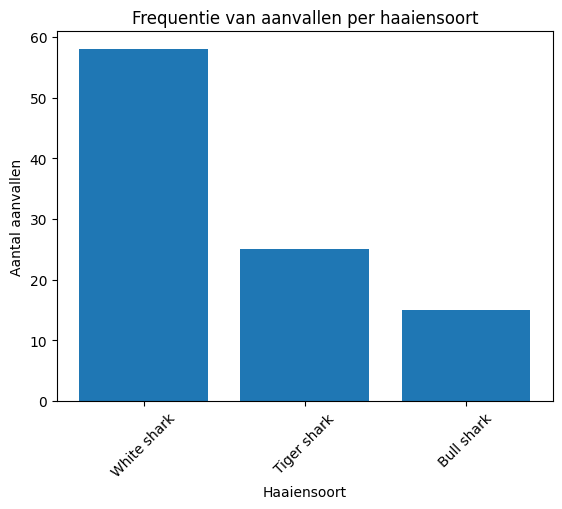

In [ ]:
import matplotlib.pyplot as plt
filtered_counts = attack_counts[attack_counts > 5] # ivm grote diversiteit species: Frequentie van attack bij specifieke haaiensoort >5

fig, ax = plt.subplots()
ax.bar(filtered_counts.index,filtered_counts.values)

ax.set_xlabel('Haaiensoort')
ax.set_ylabel('Aantal aanvallen')
ax.set_title('Frequentie van aanvallen per haaiensoort')

plt.xticks(rotation=45)

plt.show()

**Conclusie**: the meest gevaarlijke haaiensoort voor de mens is de 'white shark'. Echter belangrijk om te vermelden is dat er 2516 observaties zijn waarbij de haaiensoort is opgegeven en de waardes in zowel de kolom Fatal (y/n) als Species data bevat. Van deze 2516 observaties zijn er 383 met fatale afloop: dis is gelijk aan 15,2% van de aanvallen. En van deze 383 aanvallen zijn er minimaal 58 van een White shark (15,1%).
Na de White shark komt de Tiger shark en de Bull shark.

Belangrijk! Niet alle observaties zijn meegenomen aangezien er veel variatie is in het bijhouden van de 'species'. Alle Species observaties met data frequentie van minimaal 10 geanalyseerd en opgeschoond.


# Vraag 2: Are children more likely to be attacked by sharks?
1. Kolom 'Age' opgeschoond en nieuwe kolom 'age category' aangemaakt om te bepalen of de attack bij een kind of een ouder plaatsvond

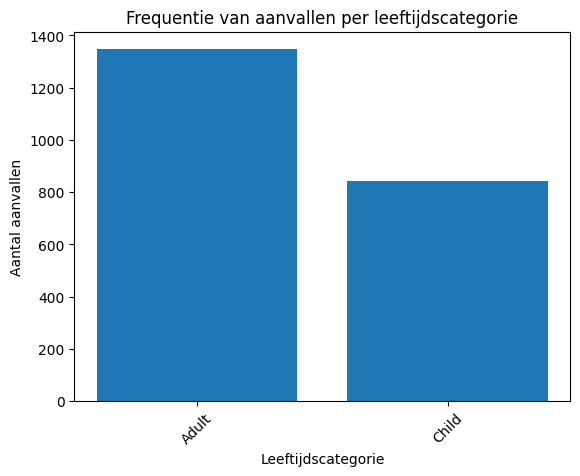

In [ ]:
df3_filtered_age = df3['age_category'].dropna()
age = df3_filtered_age.value_counts()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(age.index,age.values)

ax.set_xlabel('Leeftijdscategorie')
ax.set_ylabel('Aantal aanvallen')
ax.set_title('Frequentie van aanvallen per leeftijdscategorie')

plt.xticks(rotation=45)

plt.show()

In [ ]:
df3['age_category'].value_counts(dropna= False) # Totaal 1347 (adult) + 841 (child) + 4115 onbekend (NaN)


**Conclusie**: De dataset heeft 3 categorieen in de age_category kolom.
1.   Adult = 1347 observaties
2.   Child = 841 observaties
3.   Onbekend (nan) = 4115 observaties

Op basis van deze waarden kun je vaststellen dat volwassenen eerder worden aangevallen door een haai dan kinderen.
Belangrijk! Van de dataset (6303 observaties) kan slechts 34,7% worden toegewezen als adult/child. Om een goede conclusie te trekken moeten de 'age' kolom beter worden ingevuld zodat de onbekende waarden minimaal zijn.

2188 = adult/child
4115 = onbekend
6303 = totaal


# Vraag 3: Are shark attacks where sharks were provoked more or less dangerous?
1. fatal
2. type = provoked vs type not provoked

In [193]:
df3_total = df3.loc[(df3['Type'] == 'Provoked') | (df3['Type'] == 'Unprovoked'), ['Fatal (Y/N)', 'Type']].dropna()

df3_provoked_fatal = df3.loc[((df3['Type'] == 'Provoked')) & (df3['Fatal (Y/N)'] == 'Y'), ['Fatal (Y/N)', 'Type']].dropna()
df3_provoked = df3.loc[df3['Type'] == 'Provoked', ['Fatal (Y/N)', 'Type']].dropna()

df3_UNprovoked_fatal = df3.loc[((df3['Type'] == 'Unprovoked') & (df3['Fatal (Y/N)'] == 'Y')), ['Fatal (Y/N)', 'Type']].dropna()
df3_UNprovoked = df3.loc[df3['Type'] == 'Unprovoked', ['Fatal (Y/N)', 'Type']].dropna()


print(f'Provoked attacks van totaal:      {round(df3_provoked.shape[0] / df3_total.shape[0] * 100, 2)}%')
print('----------------------------------------')
print(f'Totaal aantal Provoked attacks:   {df3_provoked.shape[0]}')
print(f'Aantal Provoked attacks & Fatal:  {df3_provoked_fatal.shape[0]}')
print(f'% fataal van provoked attacks:    {round(df3_provoked_fatal.shape[0] / df3_provoked.shape[0] * 100, 2)}%')
print('----------------------------------------')
print(f'Totaal aantal UNprovoked attacks: {df3_UNprovoked.shape[0]}')
print(f'Aantal UNprovoked attacks & Fatal:{df3_UNprovoked_fatal.shape[0]}')
print(f'% fataal van UNprovoked attacks:  {round(df3_UNprovoked_fatal.shape[0] / df3_UNprovoked.shape[0] * 100, 2)}%')
print('----------------------------------------')

Provoked attacks van totaal:      11.13%
----------------------------------------
Totaal aantal Provoked attacks:   567
Aantal Provoked attacks & Fatal:  19
% fataal van provoked attacks:    3.35%
----------------------------------------
Totaal aantal UNprovoked attacks: 4527
Aantal UNprovoked attacks & Fatal:1181
% fataal van UNprovoked attacks:  26.09%
----------------------------------------


**Conclusie**: het verschil in gevaar van provoked met unprovoked attacks bepaalt obv fatale afloop. Slechts 11,13% van alle aanvallen die zijn provoked (totaal = type die geclassificeerd zijn als 'provoked' of 'unprovoked'). Van alle provoked attacks is slechts 3,35% fataal tov 26,09% van de unprovoked attacks. Op basis hiervan kun je stellen dadt de unprovoked attacks vaker fatale afloop hebben.

# Vraag 4: Are certain activities more likel to result in a shark attack?
1. Activities. Zie hierboven voor meer info over de manier waarop er gecategoriseerd is.

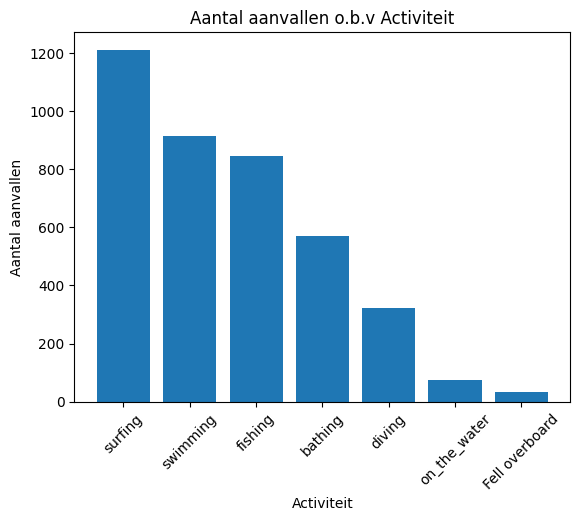

In [218]:
frequency_activity = df3['Activity'].value_counts()
activity_freq_10 = frequency_activity[frequency_activity > 10] # ivm grote diversiteit activiteiten: Frequentie van attack bij specifieke haaiensoort >5

fig, ax = plt.subplots()
ax.bar(activity_freq_10.index, activity_freq_10.values)

ax.set_xlabel('Activiteit')
ax.set_ylabel('Aantal aanvallen')
ax.set_title('Aantal aanvallen o.b.v Activiteit')

plt.xticks(rotation=45)
plt.show()

#Zie hierboven voor meer informatie van categorisering activities

**Conclusie**: op basis van alle attacks en de bijbehorende activiteit, is 'surfing' de activiteit met de meeste haai aanvallen.